In [1]:
# useful additional packages
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit_algorithms import SamplingVQE, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer

ModuleNotFoundError: No module named 'matplotlib'

In [43]:
def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

distance
 [[  0.  48.  91.  33.  85.  26.  21.  58.  30.  48.  46.  56.  50.  71.
   62.  84.  94.  23.  82.  61.]
 [ 48.   0.  63.  71.  93.  30.  60.  69.  71.  67.   2.  49.  17.  60.
   83.  97.  68.  52.  89.  35.]
 [ 91.  63.   0.  92.  65.  66.  88.  59.  95.  69.  65.  40.  80.  31.
   77.  74.   7.  77.  62.  31.]
 [ 33.  71.  92.   0.  62.  41.  12.  40.   4.  27.  70.  52.  78.  64.
   35.  59.  92.  19.  60.  67.]
 [ 85.  93.  65.  62.   0.  71.  68.  27.  67.  37.  93.  44. 108.  38.
   28.  10.  60.  62.   3.  63.]
 [ 26.  30.  66.  41.  71.   0.  31.  45.  41.  40.  29.  34.  40.  49.
   56.  74.  69.  22.  68.  35.]
 [ 21.  60.  88.  12.  68.  31.   0.  42.  10.  31.  59.  49.  67.  62.
   42.  66.  89.  11.  65.  61.]
 [ 58.  69.  59.  40.  27.  45.  42.   0.  44.  13.  69.  25.  83.  29.
   18.  29.  57.  35.  24.  45.]
 [ 30.  71.  95.   4.  67.  41.  10.  44.   0.  31.  70.  55.  77.  67.
   39.  63.  95.  20.  65.  69.]
 [ 48.  67.  69.  27.  37.  40.  31.  13.  31

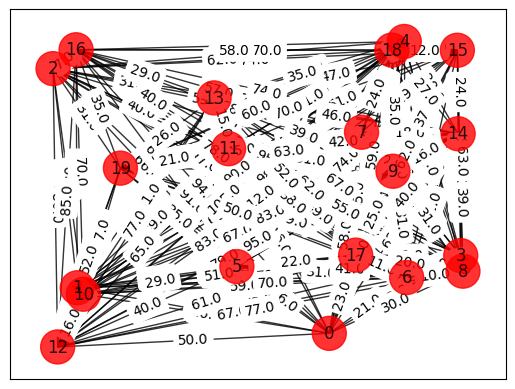

In [44]:
# Generating a graph of 20 nodes
n = 20
num_qubits = n**2
tsp = Tsp.create_random_instance(n, seed=123)
adj_matrix = nx.to_numpy_array(tsp.graph)
print("distance\n", adj_matrix)

colors = ["r" for node in tsp.graph.nodes]
pos = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes]
draw_graph(tsp.graph, colors, pos)

In [45]:
def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        node_i = order[i]
        node_j = order[j]
        if G.has_edge(node_i, node_j):
            G2.add_edge(node_i, node_j, weight=G[node_i][node_j]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)

In [46]:
qp = tsp.to_quadratic_program()
print(qp.prettyprint())

Problem name: TSP

Minimize
  46*x_0_0*x_10_1 + 46*x_0_0*x_10_19 + 56*x_0_0*x_11_1 + 56*x_0_0*x_11_19
  + 50*x_0_0*x_12_1 + 50*x_0_0*x_12_19 + 71*x_0_0*x_13_1 + 71*x_0_0*x_13_19
  + 62*x_0_0*x_14_1 + 62*x_0_0*x_14_19 + 84*x_0_0*x_15_1 + 84*x_0_0*x_15_19
  + 94*x_0_0*x_16_1 + 94*x_0_0*x_16_19 + 23*x_0_0*x_17_1 + 23*x_0_0*x_17_19
  + 82*x_0_0*x_18_1 + 82*x_0_0*x_18_19 + 61*x_0_0*x_19_1 + 61*x_0_0*x_19_19
  + 48*x_0_0*x_1_1 + 48*x_0_0*x_1_19 + 91*x_0_0*x_2_1 + 91*x_0_0*x_2_19
  + 33*x_0_0*x_3_1 + 33*x_0_0*x_3_19 + 85*x_0_0*x_4_1 + 85*x_0_0*x_4_19
  + 26*x_0_0*x_5_1 + 26*x_0_0*x_5_19 + 21*x_0_0*x_6_1 + 21*x_0_0*x_6_19
  + 58*x_0_0*x_7_1 + 58*x_0_0*x_7_19 + 30*x_0_0*x_8_1 + 30*x_0_0*x_8_19
  + 48*x_0_0*x_9_1 + 48*x_0_0*x_9_19 + 46*x_0_1*x_10_0 + 46*x_0_1*x_10_2
  + 56*x_0_1*x_11_0 + 56*x_0_1*x_11_2 + 50*x_0_1*x_12_0 + 50*x_0_1*x_12_2
  + 71*x_0_1*x_13_0 + 71*x_0_1*x_13_2 + 62*x_0_1*x_14_0 + 62*x_0_1*x_14_2
  + 84*x_0_1*x_15_0 + 84*x_0_1*x_15_2 + 94*x_0_1*x_16_0 + 94*x_0_1*x_16_2
  + 23*x_0_

In [48]:
from qiskit_optimization.converters import QuadraticProgramToQubo

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()
# print("Offset:", offset)
# print("Ising Hamiltonian:")
# print(str(qubitOp))

In [49]:
import dimod
bqm_binary = dimod.as_bqm(qubo.objective.linear.to_array(), qubo.objective.quadratic.to_array(), dimod.BINARY)
from dwave.system import DWaveSampler, EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())
result = sampler.sample(bqm_binary, label="20_nodes", num_reads=1024)
print(result)

ValueError: no embedding found

In [27]:
print(result.first)
print(result.first.sample)

Sample(sample={0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 1, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 1, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 1, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 1, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 1, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 1, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 1, 120: 0, 121: 1, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0,

In [41]:
# def is_feasible(sample_record):
#     try:
#         sample = sample_record.sample
#     except AttributeError:
#         return False  # If sample_record does not have a 'sample' attribute, return False

#     if sample.shape != (num_qubits,):
#         return False  # If the shape of the sample is not as expected, return False

#     # Check if the solution has exactly n edges (excluding self-loops)
#     valid_edges = np.sum(sample[np.arange(num_qubits) // n != np.arange(num_qubits) % n])
#     if valid_edges != n:
#         return False

#     # Check if there are any duplicate edges
#     edges = [(idx // n, idx % n) for idx in np.flatnonzero(sample) if idx // n != idx % n]
#     if len(edges) != len(set(edges)):
#         return False

#     return True

sampleset = result  # SampleSet object

# Filter the SampleSet
feasible_sampleset = sampleset.filter(lambda row: row.is_feasible)

# Print the feasible samples
print(feasible_sampleset)

AttributeError: 'Sample' object has no attribute 'is_feasible'

In [33]:
# n = 10  # Number of cities
# n = 12
best_solution = result.first.sample

print(f"Best solution energy: {result.first.energy}")
print("Best solution tour:")

tour = [(idx // n, idx % n) for idx, val in best_solution.items() if val == 1 and idx // n != idx % n]

for i, (city1, city2) in enumerate(tour, start=1):
    print(f"{i}. City {city1} -> City {city2}")

Best solution energy: -1440831.0
Best solution tour:
1. City 0 -> City 2
2. City 1 -> City 4
3. City 4 -> City 6
4. City 6 -> City 7
5. City 7 -> City 10
6. City 8 -> City 10
7. City 9 -> City 11
8. City 10 -> City 1
9. City 11 -> City 9


In [32]:
# n = 10  # Number of cities
num_qubits = n**2

def is_valid_solution(sample):
    # Check if the solution has exactly n edges (excluding self-loops)
    valid_edges = np.sum(sample[np.arange(num_qubits) // n != np.arange(num_qubits) % n])
    if valid_edges != n:
        return False

    # Check if there are any duplicate edges
    edges = [(idx // n, idx % n) for idx in np.flatnonzero(sample) if idx // n != idx % n]
    if len(edges) != len(set(edges)):
        return False

    return True

# Sort the records in ascending order of energy
sorted_records = sorted(result.record, key=lambda rec: rec.energy)

# Iterate through the sorted records
for record in sorted_records:
    sample = record.sample
    energy = record.energy

    if is_valid_solution(sample):
        print(f"Valid solution found with energy: {energy}")
        print("Tour:")

        tour = [(idx // n, idx % n) for idx in np.flatnonzero(sample) if idx // n != idx % n]
        for i, (city1, city2) in enumerate(tour, start=1):
            print(f"{i}. City {city1} -> City {city2}")

        break
    else:
        print(f"Skipping invalid solution with energy: {energy}")

Skipping invalid solution with energy: -1440831.0
Skipping invalid solution with energy: -1440693.0
Valid solution found with energy: -1440615.0
Tour:
1. City 0 -> City 3
2. City 2 -> City 0
3. City 3 -> City 2
4. City 3 -> City 11
5. City 4 -> City 6
6. City 5 -> City 4
7. City 6 -> City 7
8. City 7 -> City 5
9. City 9 -> City 5
10. City 10 -> City 1
11. City 11 -> City 9
12. City 11 -> City 10
